In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [15]:
# Load the dataset (assuming the dataset is in a CSV file named 'patients_data.csv')
df = pd.read_csv('drug200_1722406166375.csv')



In [16]:
# Preprocess the dataset
# Assuming the dataset has columns: Age, Sex, Blood_Pressure, Cholesterol, Drug
X = df[['Age', 'Sex', 'BP', 'Cholesterol']]
y = df['Drug']



In [17]:
# Convert categorical features to numerical
X = pd.get_dummies(X, drop_first=True)



In [18]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



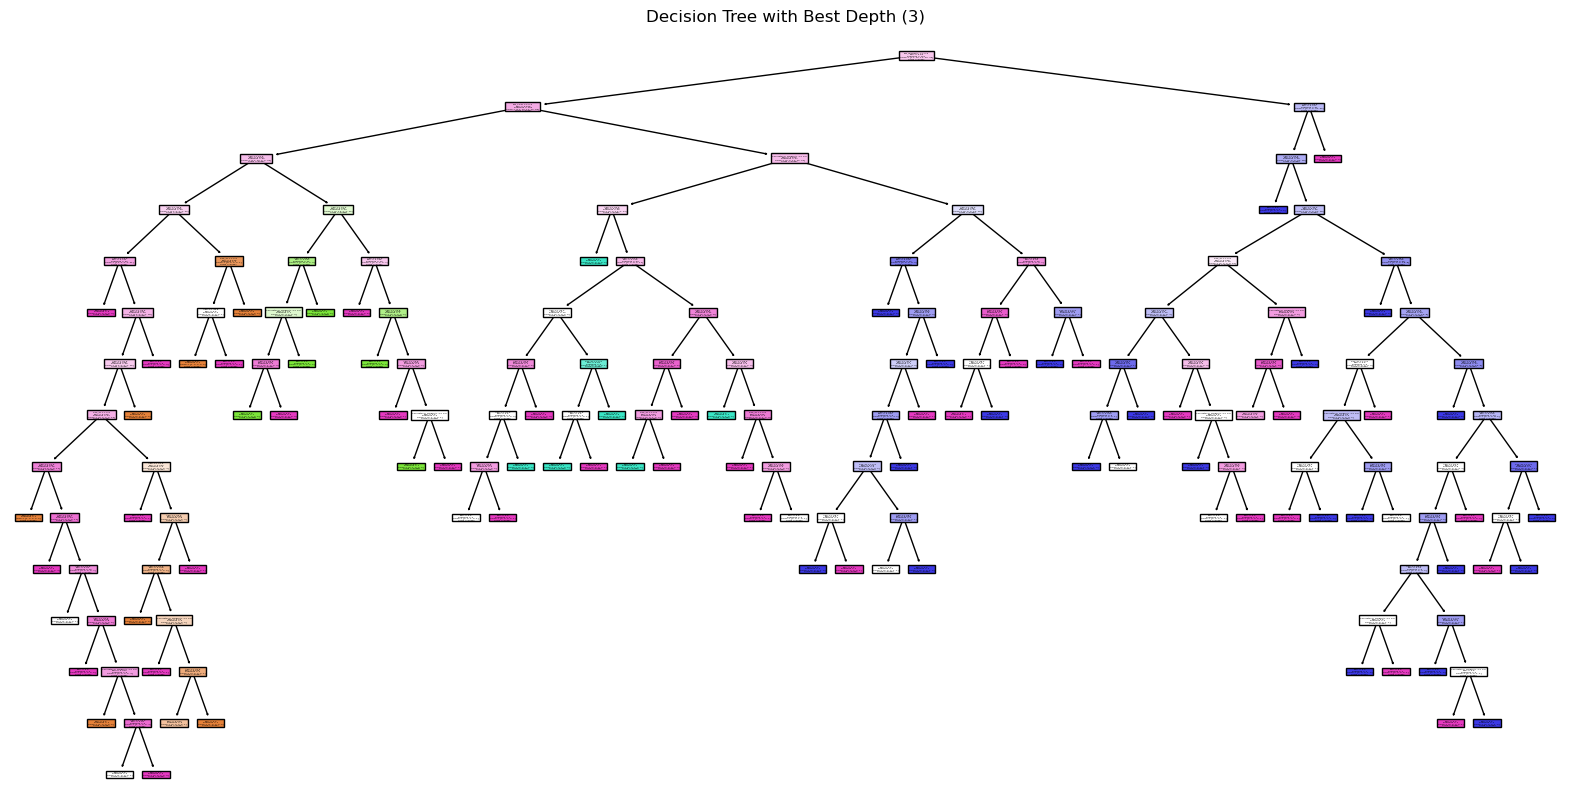

In [25]:
# a) Decision Tree classifier with no restriction for height
clf_unrestricted = DecisionTreeClassifier(random_state=42)
clf_unrestricted.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(clf_unrestricted, filled=True, feature_names=X.columns, class_names=clf_unrestricted.classes_)
plt.title(f"Decision Tree with Best Depth ({best_depth})")
plt.show()


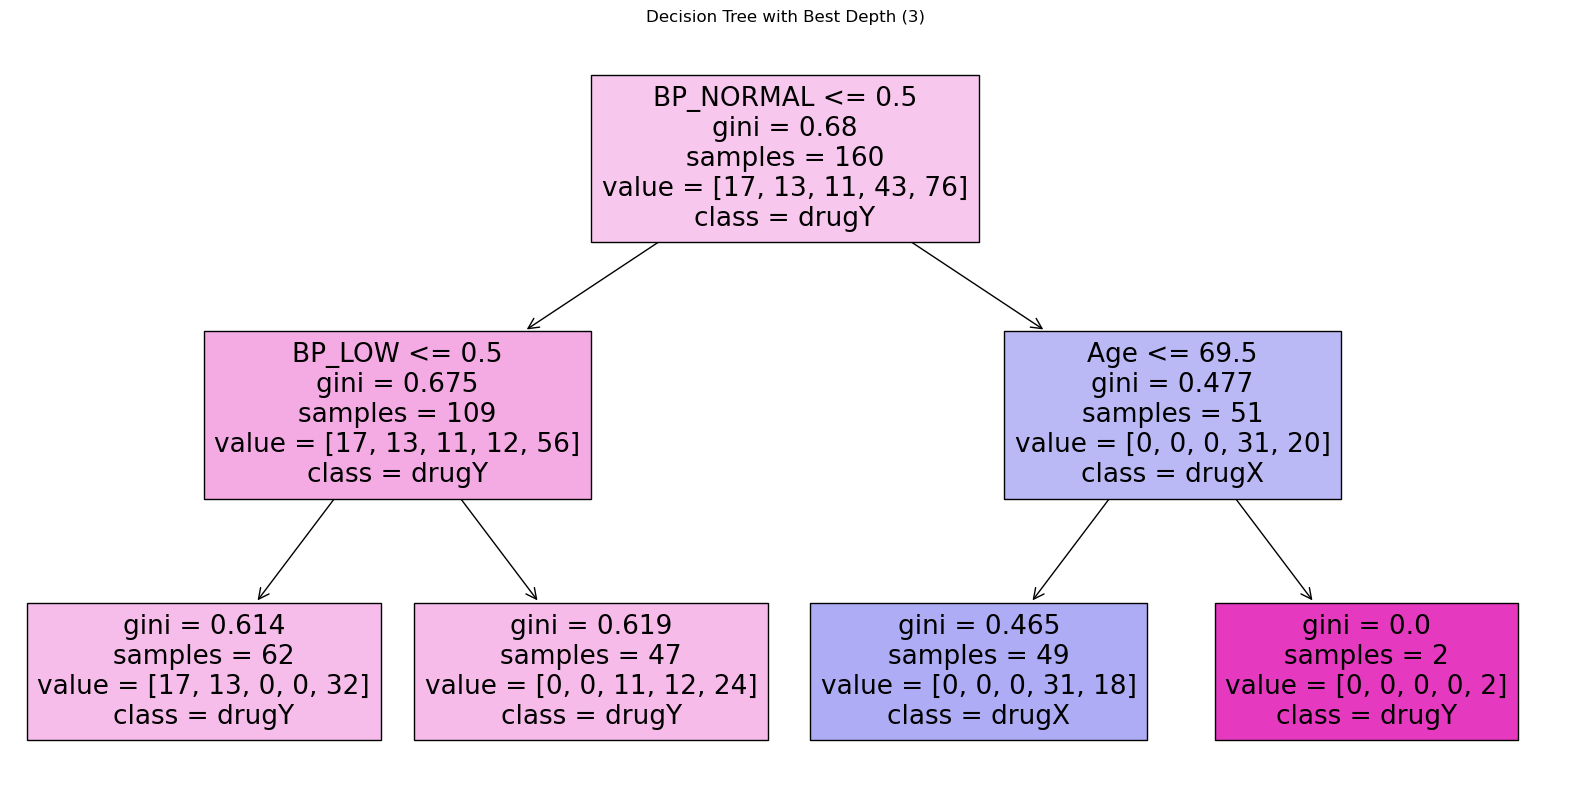

In [26]:
# b) Decision Tree classifier with maximum height of 2
clf_max_depth_2 = DecisionTreeClassifier(max_depth=2, random_state=42)
clf_max_depth_2.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(clf_max_depth_2, filled=True, feature_names=X.columns, class_names=clf_max_depth_2 .classes_)
plt.title(f"Decision Tree with Best Depth ({best_depth})")
plt.show()


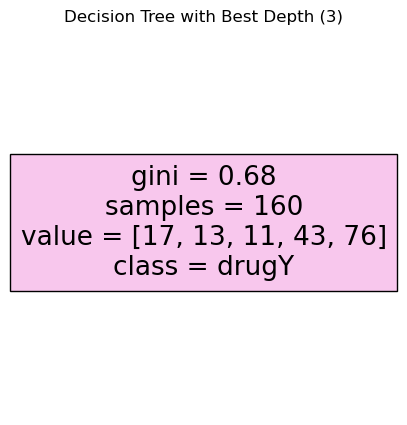

In [27]:
# c) Decision Tree classifier with purity criterion (min impurity decrease)
clf_purity = DecisionTreeClassifier(min_impurity_decrease=0.2, random_state=42)
clf_purity.fit(X_train, y_train)
plt.figure(figsize=(5,5))
plot_tree(clf_purity, filled=True, feature_names=X.columns, class_names=clf_purity.classes_)
plt.title(f"Decision Tree with Best Depth ({best_depth})")
plt.show()


In [28]:
# d) 10-fold cross-validation for various depths (2, 3, 4)
depths = [2, 3, 4]
cross_val_scores = {}
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    cross_val_scores[depth] = scores.mean()



In [29]:
# Find the best depth
best_depth = max(cross_val_scores, key=cross_val_scores.get)

# Train the best model
clf_best = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf_best.fit(X_train, y_train)

# Evaluate the models
models = {
    'Unrestricted': clf_unrestricted,
    'Max Depth 2': clf_max_depth_2,
    'Purity Criterion': clf_purity,
    'Best Depth': clf_best
}

for name, model in models.items():
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"{name} - Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}")




Unrestricted - Training Accuracy: 0.9375, Testing Accuracy: 0.6000
Max Depth 2 - Training Accuracy: 0.5563, Testing Accuracy: 0.4250
Purity Criterion - Training Accuracy: 0.4750, Testing Accuracy: 0.3750
Best Depth - Training Accuracy: 0.5875, Testing Accuracy: 0.5000


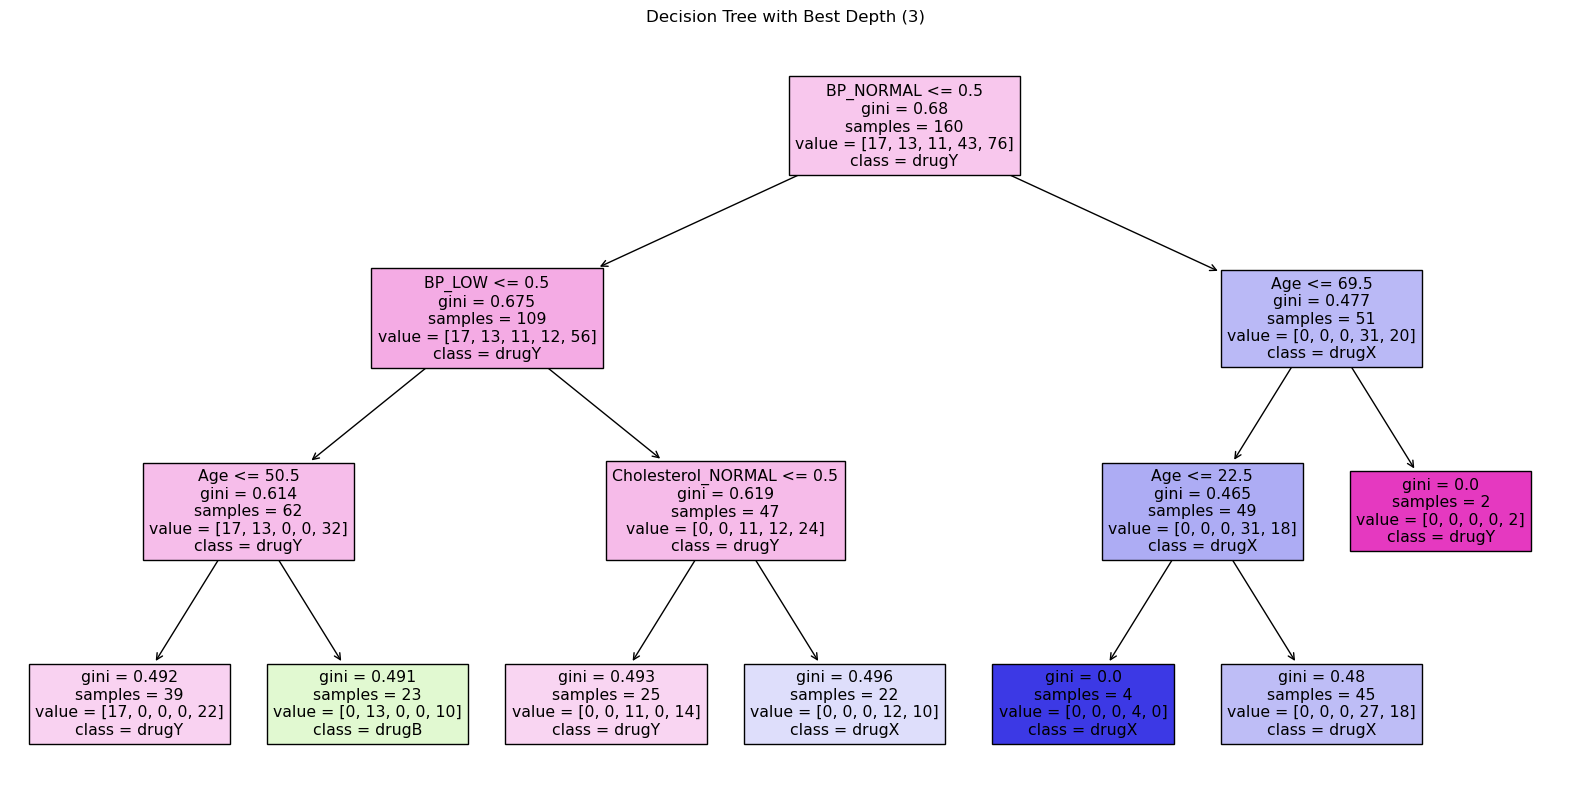

In [30]:
# Plot the decision tree (for the best model)
plt.figure(figsize=(20,10))
plot_tree(clf_best, filled=True, feature_names=X.columns, class_names=clf_best.classes_)
plt.title(f"Decision Tree with Best Depth ({best_depth})")
plt.show()